### Задание 1 

Найдите область определения и множество значений функции 
$$
y = \frac{\sqrt{4 - x^{2}}}{1 - x}
$$

Если одна из границ равна $\pm\infty$, укажите $\pm \text{inf}$

### Ответ:

$$[-2,1), (1,2]$$

$$(-\text{inf}, \text{inf})$$

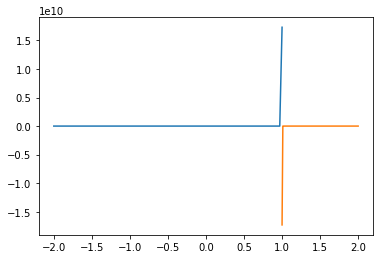

In [6]:
from matplotlib import pyplot as plt
import numpy as np

x1 = np.linspace(-2, 0.9999999999, 100)
y1 = np.sqrt(4 - x1**2) / (1 - x1)

x2 = np.linspace(1.0000000001, 2, 100)
y2 = np.sqrt(4 - x2**2) / (1 - x2)

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

### Задание 2

На отрезке $[-10, 30]$ интерполируйте функцию

$$
f(x) = (\cos{x})^{2} - 0.5.
$$

Для этого выбирете 30 равноудаленных друг от друга точек. Примените на них методы

- линейной интерполяции

- квадратичной интерполяции

- кубической интерполяции.


После этого, разделите отрезок $[-10, 30]$ на 200 равноудаленных точек и примените обученные методы.

Далее для каждого из трех рассмотренных методов рассчитайте корень из средней квадратичекой ошибки (RMSE) и округлите полученный результат до 3 - го знака:

$$
RMSE = \sqrt{\frac{1}{n}\sum\limits_{i = 1}^{n}(fact_{i} - pred_{i})^{2}}.
$$

В ответ, через запятую, укажите три соответствующих числа (сначала для линейного метода, затем для квадратичного и кубического) в качестве разделителя разрядов выбрав точку.

Например,

$$
0.213, 0.178, 0.168
$$

In [7]:
from scipy.interpolate import interp1d

x = np.linspace(-10, 30, 30)
y = np.cos(x)**2 - 0.5

f1 = interp1d(x, y, kind = 'linear')
f2 = interp1d(x, y, kind = 'quadratic')
f3 = interp1d(x, y, kind = 'cubic')

x_new = np.linspace(-10, 30, 200)
y_new = np.cos(x_new)**2 - 0.5

print('\
MSE LINEAR    = {s[0]}\n\
MSE QUADRATIC = {s[1]}\n\
MSE CUBIC     = {s[2]}\n'.format(s = [round(np.sqrt(((y_new - f1(x_new))**2).mean()), 3),
                                      round(np.sqrt(((y_new - f2(x_new))**2).mean()), 3),
                                      round(np.sqrt(((y_new - f3(x_new))**2).mean()), 3)]))

MSE LINEAR    = 0.213
MSE QUADRATIC = 0.178
MSE CUBIC     = 0.168



### Ответ:

$$
0.385,0.391,0.392
$$

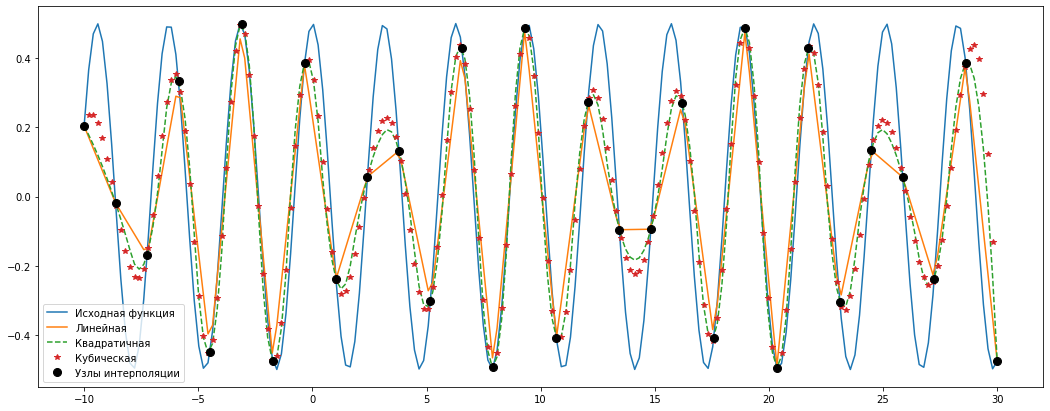

In [14]:
fig, axs = plt.subplots(figsize = (18, 7), nrows = 1, ncols = 1)

axs.plot(x_new, y_new)
axs.plot(x_new, f1(x_new), '-')
axs.plot(x_new, f2(x_new), '--')
axs.plot(x_new, f3(x_new), '*')
axs.plot(x, y, 'o', markersize = 8, color = 'black')


axs.legend(['Исходная функция', 'Линейная', 'Квадратичная', 'Кубическая', 'Узлы интерполяции'], 
            loc = 3)

plt.show()

### Задание 3 

Найти точки разрыва и определить их характер:

- $f(x) = 4x + \frac{|x - 3|}{x^{2} - x - 6}$


- $f(x) = e^{\frac{x}{x^{2} + x - 12}}$ 

Для простоты будем обозначать **точку разрыва 1 рода** числом $1$, **точку разрыва 2 рода** числом $2$, а **точку устранимого разрыва** числом $0$. В ответе для каждой из функций перечислите характеры точек разрыва в соответствии с их очередностью. То есть, если первая функция имеет 3 точки разрыва:

$$
x_{1} < x_{2} < x_{3},
$$

такие, что 

- $x_{1}$ - точка разрыва второго рода;
- $x_{2}$ - точка устранимого разрыва;
- $x_{3}$ - точка разрыва первого рода,

то в ответ укажите последовательность цифр $201$.

Каждой функции должна соответствовать своя строка.

### Ответ:

- $f(x) = 4x + \frac{|x - 3|}{x^{2} - x - 6}$

Находим нули знаменателя - это точки разрыва:

$$
x_{1} = -2, \quad x_{2} = 3.
$$

Далее исследуем левый и правый предел в данных точках:

In [19]:
from sympy import *

z = Symbol('z')

display(limit(4*z + abs(z - 3) / (z**2 - z - 6), z, -2, '-'))
display(limit(4*z + abs(z - 3) / (z**2 - z - 6), z, -2, '+'))

display(limit(4*z + abs(z - 3) / (z**2 - z - 6), z, 3, '-'))
display(limit(4*z + abs(z - 3) / (z**2 - z - 6), z, 3, '+'))

oo

-oo

59/5

61/5

Таким образом, 

- $x_{1} = -2$ - точка разрыва второго рода;

- $x_{2} = 3$ - точка разрыва первого рода.

Ответ

$$
21
$$


- $f(x) = e^{\frac{x}{x^{2} + x - 12}}$ 

Находим нули знаменателя - это точки разрыва:

$$
x_{1} = -4, \quad x_{2} = 3.
$$

Далее исследуем левый и правый предел в данных точках:

In [20]:
display(limit(exp(z / (z**2 + z - 12)), z, -4, '-'))
display(limit(exp(z / (z**2 + z - 12)), z, -4, '+'))

display(limit(exp(z / (z**2 + z - 12)), z, 3, '-'))
display(limit(exp(z / (z**2 + z - 12)), z, 3, '+'))

0

oo

0

oo

Таким образом, 

- $x_{1} = -4$ - точка разрыва второго рода;

- $x_{2} = 3$ - точка разрыва второго рода.

Ответ

$$
22
$$

### Задание 4

Используя библиотеку *sympy* найдите следующие пределы:

- $\lim_{x \to 0}x^{x}$


- $\lim_{x \to 2}\frac{4x^{3} - 7x^{2} + 1}{3x^{3} + 2x^{2} - 9x + 12}$

### Ответ:

In [21]:
display(limit(z**z, z, 0))
display(limit((4 * z**3 - 7 * z**2 + 1) / (3 * z**3 + 2 * z**2 - 9 * z + 12), z, 2))

1

5/26

In [24]:
round(5/26, 4)

0.1923

### Задание 5

Найдите производную функции и посчитайте ее значение в точке $a$:

- $f(x) = \frac{x^{3} - 2x}{\sqrt{x}}$, $a = 4$;


- $f(x) = \frac{1}{x - 4} + \cos{x} - \sqrt{x + 9}$, $a = 0$. 

### Ответ:

In [35]:
display(diff((z**3 - 2*z) / sqrt(z), z).subs(z, 4))
display(diff(1 / (z - 4) + cos(z) - sqrt(z + 9)).subs(z, 0))

39/2

-11/48

In [26]:
print(round(39 / 2, 4))
print(round(-11 / 48, 4))

19.5
-0.2292


### Задание 6

Найдите количество решений уравнения

$$
x\sin{\frac{1}{x}} + 0.2 = 0.
$$

### Ответ:

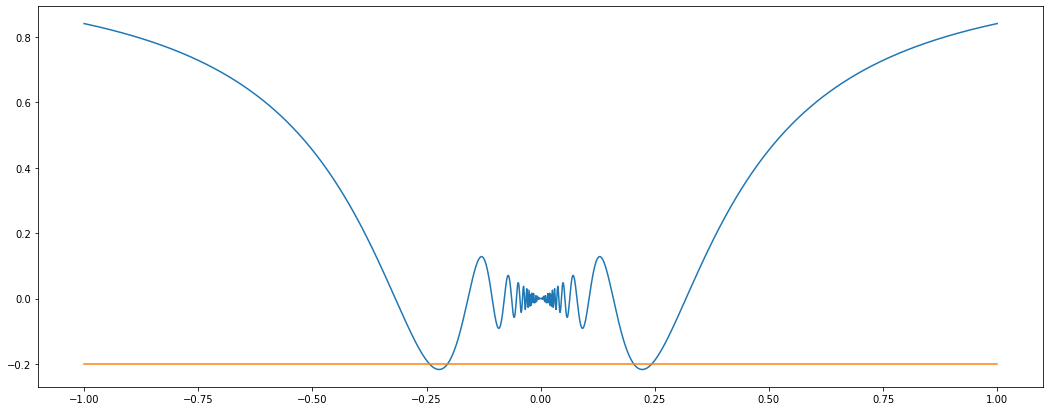

In [46]:
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 2000)
y = x * np.sin(1 / x)

fig, axs = plt.subplots(figsize = (18, 7), nrows = 1, ncols = 1)

axs.plot(x, y)
axs.plot([-1, 1], [-0.2, -0.2])

plt.show()

Таким образом, $4$ решения.

$$
f(x) = |x| - \frac{x^2}{8} = 
\begin{cases}
-x - \frac{x^2}{8} = -x\Big(1 + \frac{x}{8}\Big), \quad x < 0,\\
x - \frac{x^2}{8} = x\Big(1 - \frac{x}{8}\Big), \quad x > 0.
\end{cases}
$$

$$
f^{'}(x) = \Bigg(|x| - \frac{x^2}{8}\Bigg)^{'} = 
\begin{cases}
\Bigg(-x - \frac{x^2}{8}\Bigg)^{'} = -1 - \frac{x}{4}, \quad x < 0,\\
\Bigg(x - \frac{x^2}{8}\Bigg)^{'} = 1 - \frac{x}{4}, \quad x > 0.
\end{cases}
$$

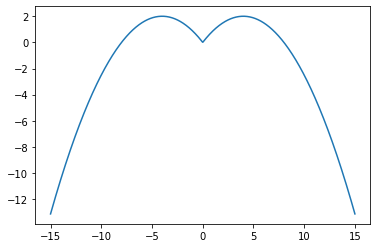

In [8]:
x = np.linspace(-15, 15, 1000)
y = abs(x) - x**2 * 0.125

plt.plot(x, y)
plt.show()